In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
with zipfile.ZipFile("drive/MyDrive/deep learning/compressed_dataset.csv.zip", 'r') as zip_ref:
    zip_ref.extractall('')

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
df =  pd.read_csv("compressed_dataset.csv")  

In [ ]:

df.head()

,Unnamed: 0,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms
0,0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785
1,19,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895
2,40,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0
3,55,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466
4,78,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0


In [ ]:
df = df.drop(["buffer_ms", 'Unnamed: 0'], axis = 1)
df.head(10)

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0
5,1632762134093,5.0,107.0,105152.0,62.0,3.0,WFH,1.000000,0.0
6,1632762160299,5.0,107.0,4168.0,2.0,3.0,WFO,1.000000,0.9
7,1632762170855,5.0,107.0,6704.0,62.0,3.0,WFH,0.999990,0.9
8,1632762181546,5.0,107.0,4623.0,2.0,3.0,WFO,1.000000,0.9
9,1632762218942,5.0,107.0,22415.0,2.0,3.0,WFO,1.000000,0.9


In [ ]:
df.info

<bound method DataFrame.info of               timestamp  customer_id  event_id  viewer_id  city_id  \
0         1632762065906          5.0     107.0    11661.0      2.0   
1         1632762104254          5.0     107.0    12810.0      2.0   
2         1632762108299          5.0     107.0    15129.0     19.0   
3         1632762112510          5.0     107.0     5860.0    217.0   
4         1632762129231          5.0     107.0     4483.0      2.0   
...                 ...          ...       ...        ...      ...   
20615365  1647872264309          1.0     401.0      845.0     19.0   
20615366  1647872276879          1.0     401.0    11100.0   3963.0   
20615367  1647872288293          1.0     401.0     2155.0      6.0   
20615368  1647872288564          1.0     401.0     1011.0     19.0   
20615369  1647872334266          1.0     401.0     2791.0     19.0   

          country_id viewer_type       qoe  engagement  
0                3.0         WFO  0.999976         0.0  
1            

In [ ]:
df['engagement_level'] = pd.cut(df['engagement'],5,labels=['Bad','Poor','Average','Good','Excellent'])
df.head()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,engagement_level
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,Bad
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,Excellent
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,Excellent
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,Bad
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,Bad


In [ ]:
df[['engagement', 'qoe']].mean()

engagement    0.439598
qoe           0.984142
dtype: float64

In [ ]:
temp = df[['engagement','qoe', 'event_id']].groupby('event_id').mean()
temp

,engagement,qoe
event_id,,
0.0,0.388638,0.989960
1.0,0.391441,0.995400
2.0,0.557737,0.971585
3.0,0.289493,0.989878
4.0,0.639439,0.993371
...,...,...
729.0,0.853272,0.999999
730.0,0.247916,0.732950
731.0,0.000000,0.999999


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83f5e25d90>,
      dtype=object)

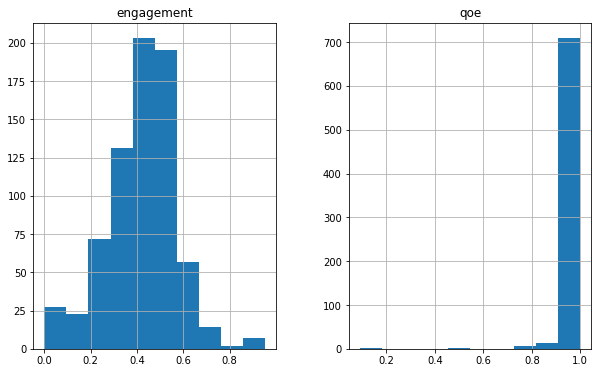

In [ ]:
temp.hist(figsize=(10,6))

In [ ]:
temp = df[['engagement','qoe', 'event_id']].groupby('event_id').std()
temp

,engagement,qoe
event_id,,
0.0,0.440612,0.081151
1.0,0.441042,0.053762
2.0,0.434791,0.136956
3.0,0.415737,0.077725
4.0,0.394964,0.066250
...,...,...
729.0,0.188980,0.000005
730.0,0.381645,0.320095
731.0,0.000000,0.000003


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83f5df6810>,
      dtype=object)

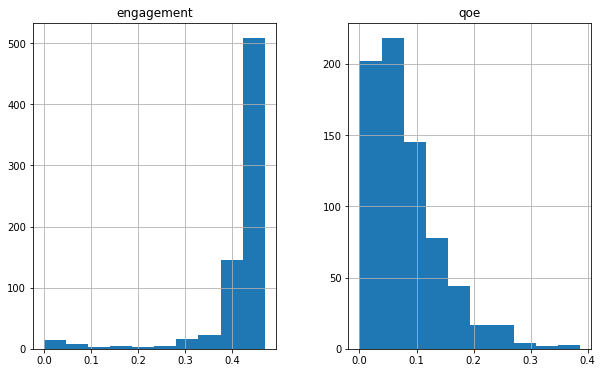

In [ ]:
temp.hist(figsize=(10,6))

In [ ]:
temp = df[['engagement','qoe', 'event_id']].groupby('event_id').mean()

# Viewer engagement and engagement level over time during an event

**For sampling we will choose events with average engagement between 0.40 and 0.50**

In [ ]:
temp1 = temp[temp['engagement'] > 0.40]
temp1[temp1['engagement'] < 0.50]

,engagement,qoe
event_id,,
10.0,0.472117,0.977197
15.0,0.470453,0.996973
20.0,0.457486,0.996839
27.0,0.440867,0.970886
28.0,0.475346,0.993951
...,...,...
682.0,0.481052,0.999694
692.0,0.470286,0.996499
701.0,0.417696,0.966495


In [ ]:
temp1.sample(n = 3, random_state = 1)

,engagement,qoe
event_id,,
256.0,0.441582,0.973900
432.0,0.459969,0.989240
252.0,0.529437,0.999075


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f350e02a750>]],
      dtype=object)

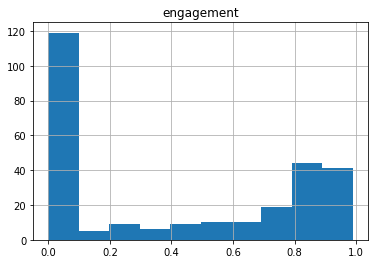

In [ ]:
event_256 = df[df['event_id'] == 256.0].sort_values('timestamp')
temp = event_256[['viewer_id', 'engagement']].groupby('viewer_id').mean()
temp.hist()

**For most viewers, the average engagement at event 256 is between 0 and 0.1**
We will select 2 viewers with average engagement between 0 and 0.1, 2 viewers with average engagement between 0.1 and 0.7 and 2 viewers with average engagement between 0.7 and 1

In [ ]:
temp1 = temp[temp['engagement'] > 0.0]
temp1[temp1['engagement'] < 0.1].sample(n = 2, random_state = 1)

,engagement
viewer_id,
102999.0,0.047694
70913.0,0.093479


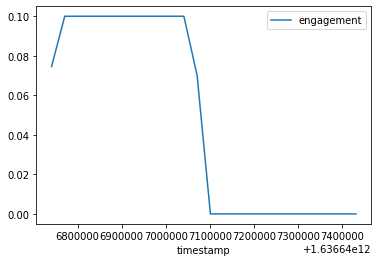

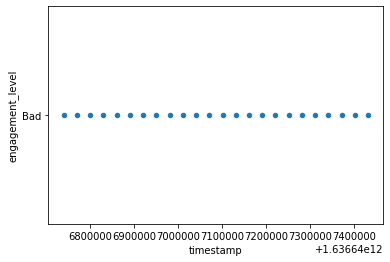

In [ ]:
event_256[event_256['viewer_id'] == 102999.0].plot(kind ='line', x = 'timestamp', y = 'engagement')
event_256[event_256['viewer_id'] == 102999.0].plot(kind ='scatter', x = 'timestamp', y = 'engagement_level')

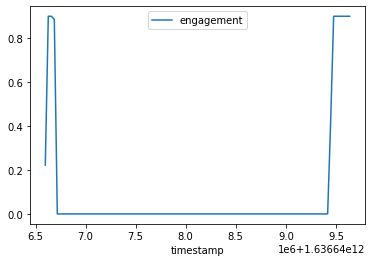

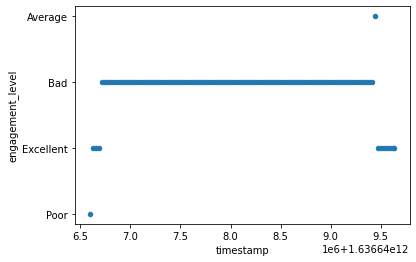

In [ ]:
event_256[event_256['viewer_id'] == 70913.0].plot(kind ='line', x = 'timestamp', y = 'engagement')
event_256[event_256['viewer_id'] == 70913.0].plot(kind ='scatter', x = 'timestamp', y = 'engagement_level')

In [ ]:
temp1 = temp[temp['engagement'] > 0.1]
temp1[temp1['engagement'] <= 0.7].sample(n = 2, random_state = 5)

,engagement
viewer_id,
102610.0,0.677846
82366.0,0.277391


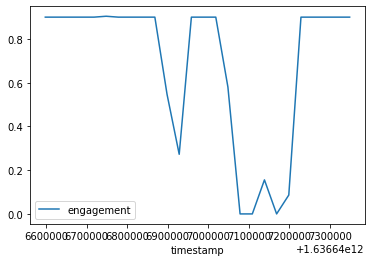

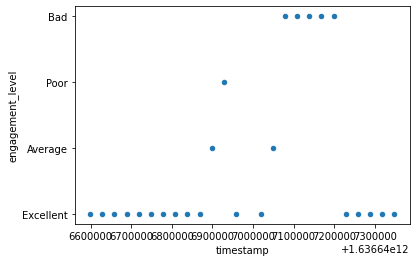

In [ ]:
event_256[event_256['viewer_id'] == 102610.0].plot(kind ='line', x = 'timestamp', y = 'engagement')
event_256[event_256['viewer_id'] == 102610.0].plot(kind ='scatter', x = 'timestamp', y = 'engagement_level')

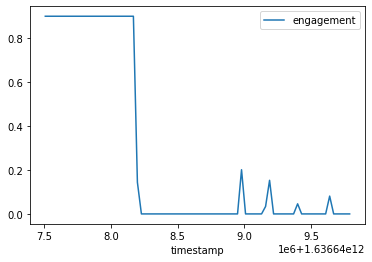

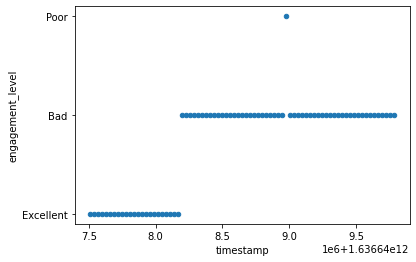

In [ ]:
event_256[event_256['viewer_id'] == 82366.0].plot(kind ='line', x = 'timestamp', y = 'engagement')
event_256[event_256['viewer_id'] == 82366.0].plot(kind ='scatter', x = 'timestamp', y = 'engagement_level')

In [ ]:
temp1 = temp[temp['engagement'] > 0.7]
temp1.sample(n = 2, random_state = 1)

,engagement
viewer_id,
79057.0,0.850220
74302.0,0.947674


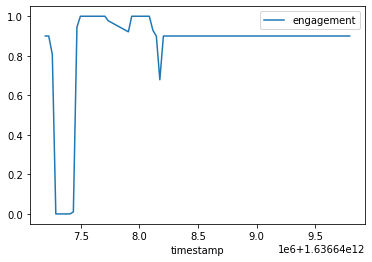

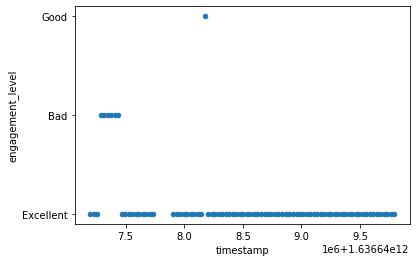

In [ ]:
event_256[event_256['viewer_id'] == 79057.0].plot(kind ='line', x = 'timestamp', y = 'engagement')
event_256[event_256['viewer_id'] == 79057.0].plot(kind ='scatter', x = 'timestamp', y = 'engagement_level')

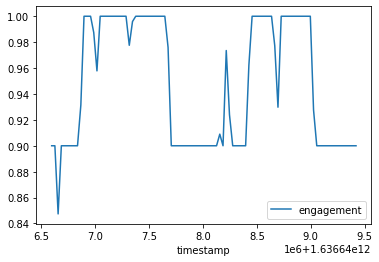

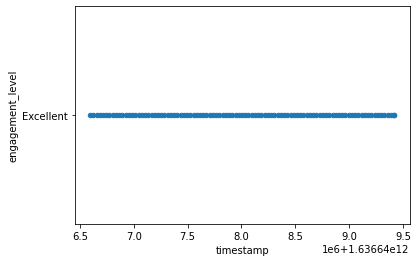

In [ ]:
event_256[event_256['viewer_id'] == 74302.0].plot(kind ='line', x = 'timestamp', y = 'engagement')
event_256[event_256['viewer_id'] == 74302.0].plot(kind ='scatter', x = 'timestamp', y = 'engagement_level')

**We will perform the same action for the events 252.0 and 432.0**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f350d5042d0>]],
      dtype=object)

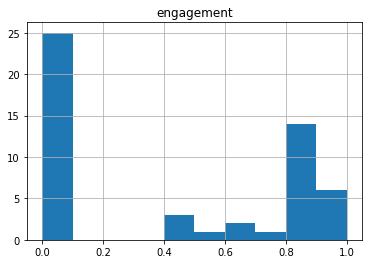

In [ ]:
event_252 = df[df['event_id'] == 252.0].sort_values('timestamp')
temp = event_252[['viewer_id', 'engagement']].groupby('viewer_id').mean()
temp.hist()

**We can see similar behavior compared to event 256**

In [ ]:
temp1 = temp[temp['engagement'] > 0.0]
temp1[temp1['engagement'] < 0.1].sample(n = 2, random_state = 2)

,engagement
viewer_id,
41465.0,0.022692
5727.0,0.093200


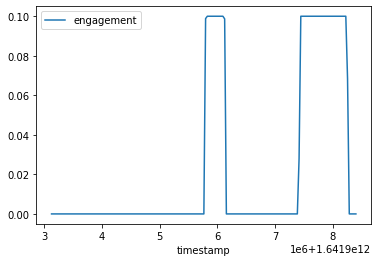

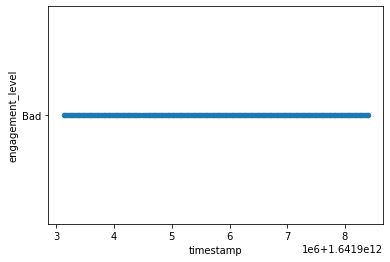

In [ ]:
event_252[event_252['viewer_id'] == 41465.0].plot(kind ='line', x = 'timestamp', y = 'engagement')
event_252[event_252['viewer_id'] == 41465.0].plot(kind ='scatter', x = 'timestamp', y = 'engagement_level')

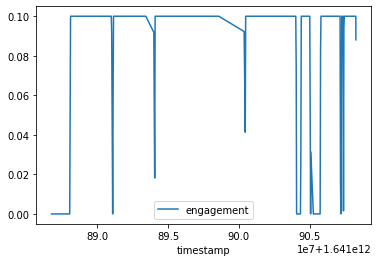

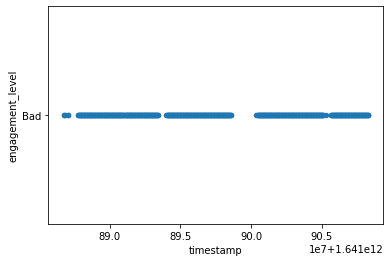

In [ ]:
event_252[event_252['viewer_id'] == 5727.0].plot(kind ='line', x = 'timestamp', y = 'engagement')
event_252[event_252['viewer_id'] == 5727.0].plot(kind ='scatter', x = 'timestamp', y = 'engagement_level')

In [ ]:
temp1 = temp[temp['engagement'] > 0.1]
temp1[temp1['engagement'] <= 0.7].sample(n = 2, random_state = 1)

,engagement
viewer_id,
16385.0,0.604034
4819.0,0.493885


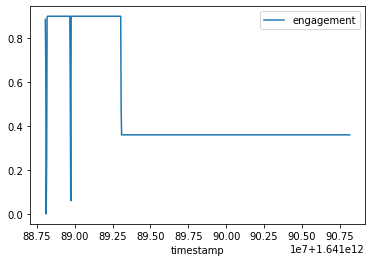

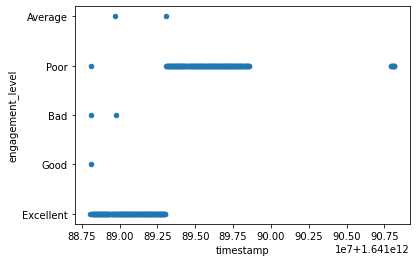

In [ ]:
event_252[event_252['viewer_id'] == 16385.0].plot(kind ='line', x = 'timestamp', y = 'engagement')
event_252[event_252['viewer_id'] == 16385.0].plot(kind ='scatter', x = 'timestamp', y = 'engagement_level')

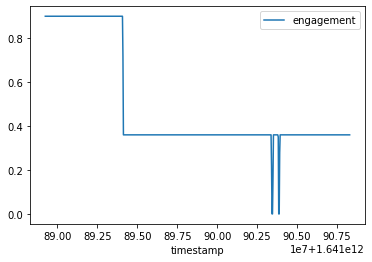

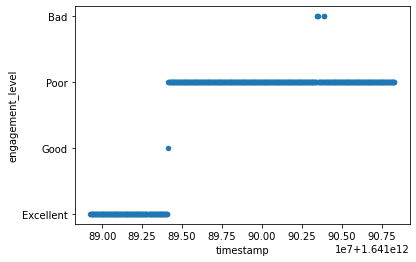

In [ ]:
event_252[event_252['viewer_id'] == 4819.0].plot(kind ='line', x = 'timestamp', y = 'engagement')
event_252[event_252['viewer_id'] == 4819.0].plot(kind ='scatter', x = 'timestamp', y = 'engagement_level')

In [ ]:
temp1 = temp[temp['engagement'] > 0.7]
temp1.sample(n = 2, random_state = 5)

,engagement
viewer_id,
3180.0,0.851492
75383.0,0.900000


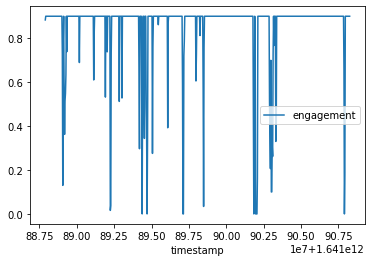

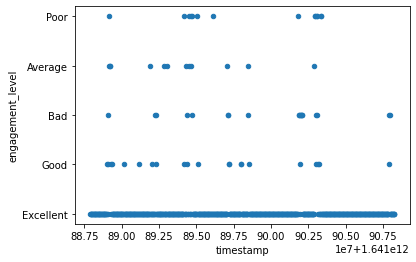

In [ ]:
event_252[event_252['viewer_id'] == 3180.0].plot(kind ='line', x = 'timestamp', y = 'engagement')
event_252[event_252['viewer_id'] == 3180.0].plot(kind ='scatter', x = 'timestamp', y = 'engagement_level')

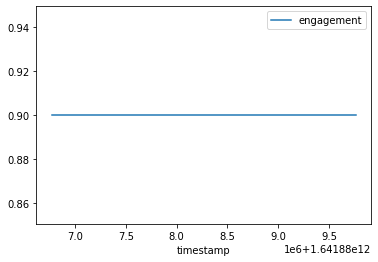

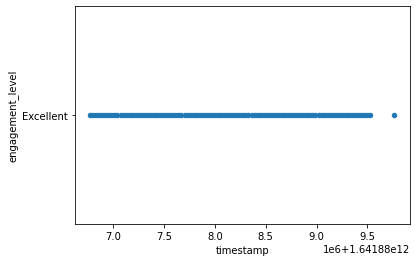

In [ ]:
event_252[event_252['viewer_id'] == 75383.0].plot(kind ='line', x = 'timestamp', y = 'engagement')
event_252[event_252['viewer_id'] == 75383.0].plot(kind ='scatter', x = 'timestamp', y = 'engagement_level')

**The last one seems like an outlier, as it doesnt have spikes. Maybe it is a presenter which is always engaged**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f350d2b3690>]],
      dtype=object)

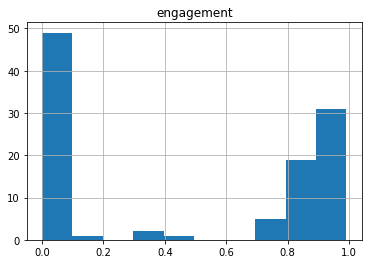

In [ ]:
event_432 = df[df['event_id'] == 432.0].sort_values('timestamp')
temp = event_432[['viewer_id', 'engagement']].groupby('viewer_id').mean()
temp.hist()

**Sme behavior with events 252 and 256**

In [ ]:
temp1 = temp[temp['engagement'] > 0.0]
temp1[temp1['engagement'] <= 0.1].sample(n = 2, random_state = 4)

,engagement
viewer_id,
61819.0,0.022325
100405.0,0.054970


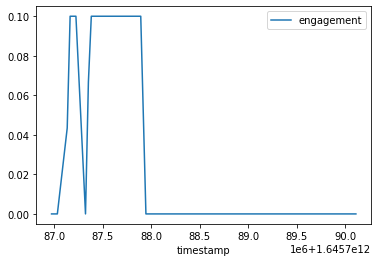

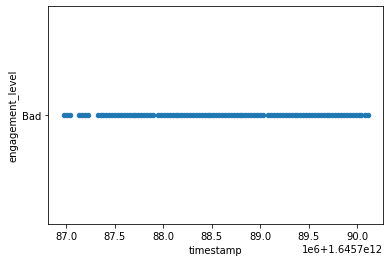

In [ ]:
event_432[event_432['viewer_id'] == 61819.0].plot(kind ='line', x = 'timestamp', y = 'engagement')
event_432[event_432['viewer_id'] == 61819.0].plot(kind ='scatter', x = 'timestamp', y = 'engagement_level')

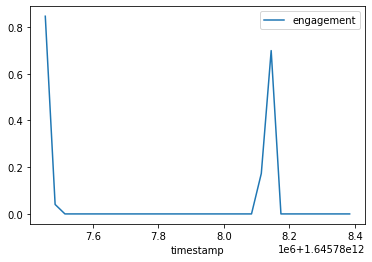

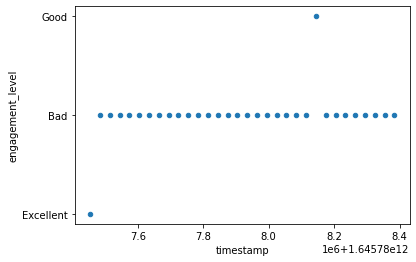

In [ ]:
event_432[event_432['viewer_id'] == 100405.0].plot(kind ='line', x = 'timestamp', y = 'engagement')
event_432[event_432['viewer_id'] == 100405.0].plot(kind ='scatter', x = 'timestamp', y = 'engagement_level')

In [ ]:
temp1 = temp[temp['engagement'] > 0.1]
temp1[temp1['engagement'] <= 0.7].sample(n = 2, random_state = 3)

,engagement
viewer_id,
86003.0,0.69605
107701.0,0.34233


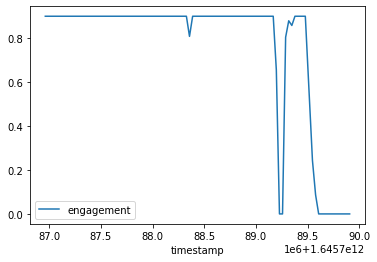

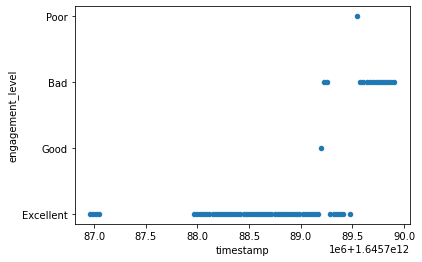

In [ ]:
event_432[event_432['viewer_id'] == 86003.0].plot(kind ='line', x = 'timestamp', y = 'engagement')
event_432[event_432['viewer_id'] == 86003.0].plot(kind ='scatter', x = 'timestamp', y = 'engagement_level')

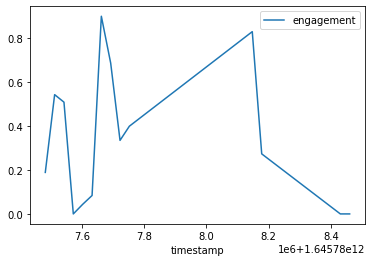

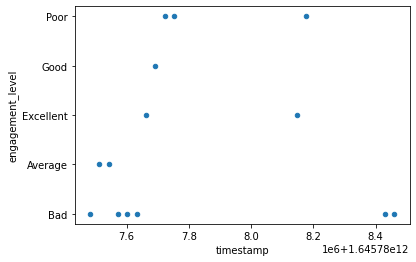

In [ ]:
event_432[event_432['viewer_id'] == 107701.0].plot(kind ='line', x = 'timestamp', y = 'engagement')
event_432[event_432['viewer_id'] == 107701.0].plot(kind ='scatter', x = 'timestamp', y = 'engagement_level')

In [ ]:
temp1 = temp[temp['engagement'] > 0.7]
temp1.sample(n = 2, random_state = 1)

,engagement
viewer_id,
53415.0,0.898953
20763.0,0.882429


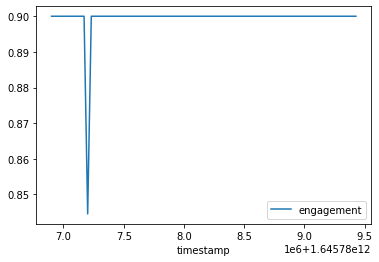

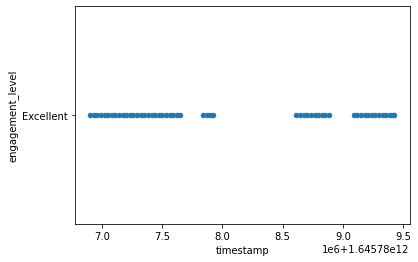

In [ ]:
event_432[event_432['viewer_id'] == 53415.0].plot(kind ='line', x = 'timestamp', y = 'engagement')
event_432[event_432['viewer_id'] == 53415.0].plot(kind ='scatter', x = 'timestamp', y = 'engagement_level')

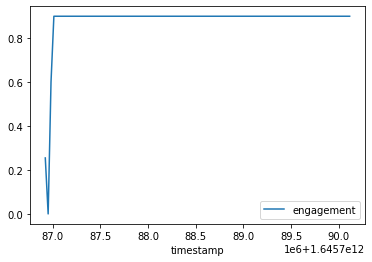

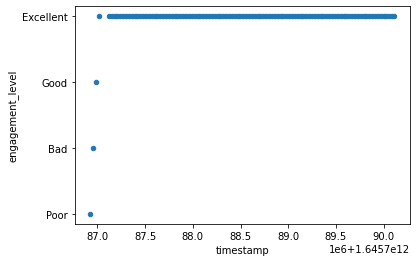

In [ ]:
event_432[event_432['viewer_id'] == 20763.0].plot(kind ='line', x = 'timestamp', y = 'engagement')
event_432[event_432['viewer_id'] == 20763.0].plot(kind ='scatter', x = 'timestamp', y = 'engagement_level')

# Viewers QOE over time during an event

**We will choose events with average qoe > 0.9**

In [ ]:
temp = df[['qoe', 'event_id']].groupby('event_id').mean()
temp = temp[temp['qoe'] >= 0.90]
temp

,qoe
event_id,
0.0,0.989960
1.0,0.995400
2.0,0.971585
3.0,0.989878
4.0,0.993371
...,...
728.0,1.000000
729.0,0.999999
731.0,0.999999


**We will choose randomly 3 events**

In [ ]:
temp.sample(n = 3, random_state = 42)

,qoe
event_id,
513.0,0.999858
399.0,0.984154
214.0,0.994873


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f350d6490d0>]],
      dtype=object)

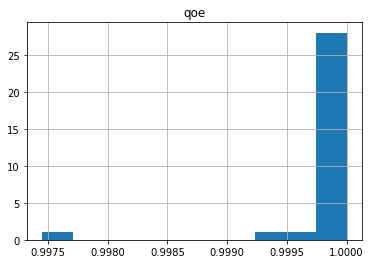

In [ ]:
event_513 = df[df['event_id'] == 513.0].sort_values('timestamp')
temp = event_513[['viewer_id', 'qoe']].groupby('viewer_id').mean()
temp.hist()

**Most of the viewers have average qoe > 0.999, so we will choose 3 random viewers with average qoe > 0.999. It is clear that most viewers will have almost constant qoe == 1 for that event**

In [ ]:
temp1 = temp[temp['qoe'] > 0.999]
temp1.sample(n = 3, random_state = 1)

,qoe
viewer_id,
47496.0,0.999999
49191.0,1.000000
16526.0,1.000000


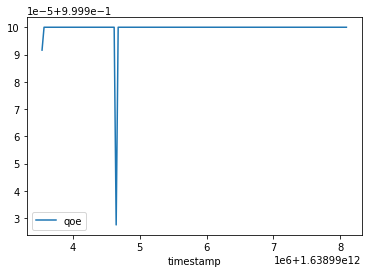

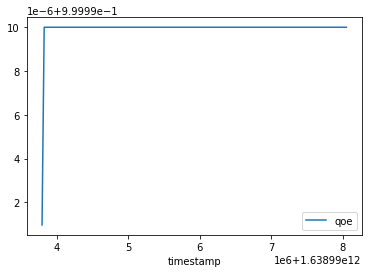

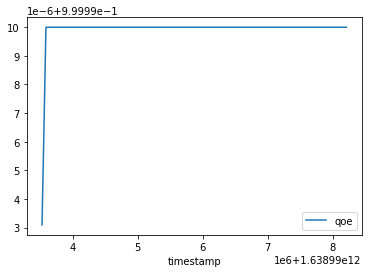

In [ ]:
event_513[event_513['viewer_id'] == 47496.0].plot(kind ='line', x = 'timestamp', y = 'qoe')
event_513[event_513['viewer_id'] == 49191.0].plot(kind ='line', x = 'timestamp', y = 'qoe')
event_513[event_513['viewer_id'] == 16526.0].plot(kind ='line', x = 'timestamp', y = 'qoe')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f350cd12390>]],
      dtype=object)

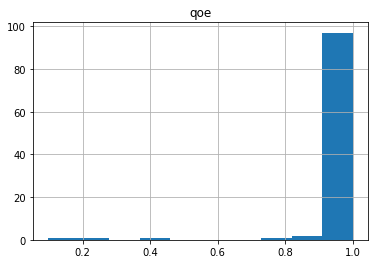

In [ ]:
event_399 = df[df['event_id'] == 399.0].sort_values('timestamp')
temp = event_399[['viewer_id', 'qoe']].groupby('viewer_id').mean()
temp.hist()

**We will randomly choose 3 viewers with average qoe > 0.8**

In [ ]:
temp1 = temp[temp['qoe'] > 0.8]
temp1.sample(n = 3, random_state = 1)

,qoe
viewer_id,
85585.0,1.000000
77232.0,0.904752
6744.0,0.999498


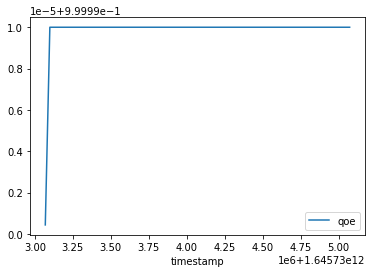

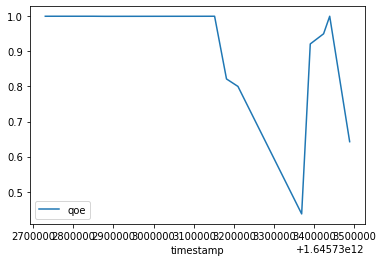

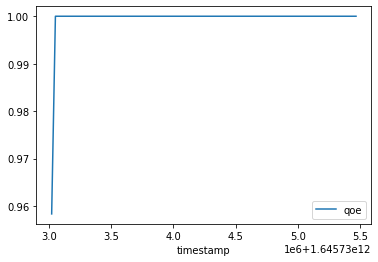

In [ ]:
event_399[event_399['viewer_id'] == 85585.0].plot(kind ='line', x = 'timestamp', y = 'qoe')
event_399[event_399['viewer_id'] == 77232.0].plot(kind ='line', x = 'timestamp', y = 'qoe')
event_399[event_399['viewer_id'] == 6744.0].plot(kind ='line', x = 'timestamp', y = 'qoe')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f350c9db250>]],
      dtype=object)

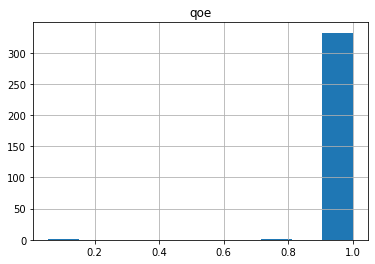

In [ ]:
event_214 = df[df['event_id'] == 214.0].sort_values('timestamp')
temp = event_214[['viewer_id', 'qoe']].groupby('viewer_id').mean()
temp.hist()

**It is clear that almost all viewers have qoe == 1 at every single timestamp**

# Viewer engagement level duration over country

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59ac5c2090>]],
      dtype=object)

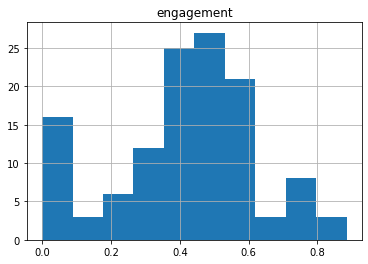

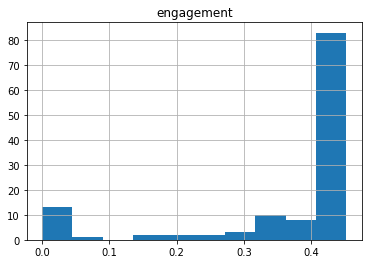

In [ ]:
temp = df[['engagement', 'country_id']].groupby('country_id').mean()
temp.hist()

df[['engagement', 'country_id']].groupby('country_id').std().hist()

**Most cities have average engagement that lies in the intervals [0.0, 0.1] and [0.35, 0.65], but there is high std**

In [ ]:
temp = df[['country_id', 'event_id']].groupby('country_id').nunique()
temp

,event_id
country_id,
0.0,170
1.0,349
2.0,157
3.0,127
4.0,121
...,...
119.0,1
120.0,1
121.0,1


**We will use countries with at least 100 events**

In [ ]:
temp[temp['event_id'] >= 100]

,event_id
country_id,
0.0,170
1.0,349
2.0,157
3.0,127
4.0,121
6.0,140
7.0,108
8.0,108
12.0,141


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59ac7f3e10>]],
      dtype=object)

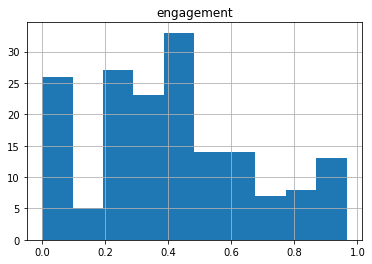

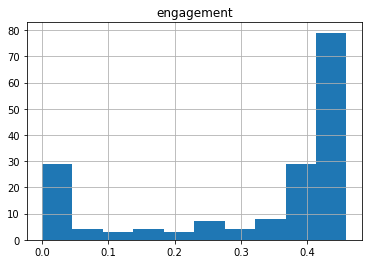

In [ ]:
country_0 =  df[df['country_id'] == 0]
country_0[['engagement', 'event_id']].groupby('event_id').mean().hist()

country_0 =  df[df['country_id'] == 0]
country_0[['engagement', 'event_id']].groupby('event_id').std().hist()

**Country 0's events have all values of average engagement with most of them lying in the intervals [0, 0.1] and [0.2,0.5]**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59ac7f3710>]],
      dtype=object)

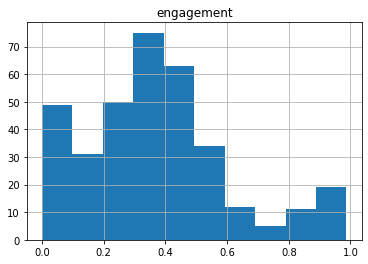

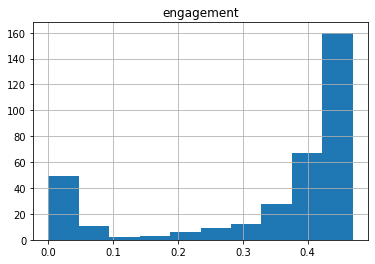

In [ ]:
country_1 =  df[df['country_id'] == 1]
country_1[['engagement', 'event_id']].groupby('event_id').mean().hist()

country_1 =  df[df['country_id'] == 1]
country_1[['engagement', 'event_id']].groupby('event_id').std().hist()

**Country 1's events have the same behavior with country 0's events but the peak is in the interval [0.3, 0.4]**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f350d197790>]],
      dtype=object)

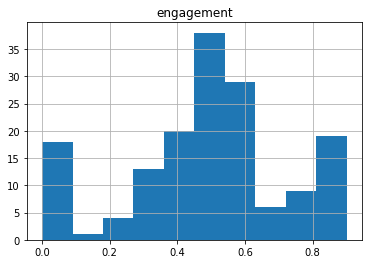

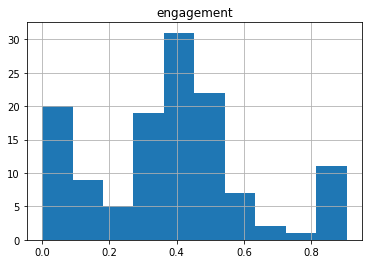

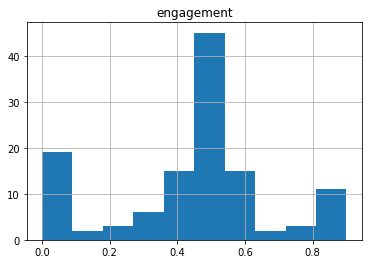

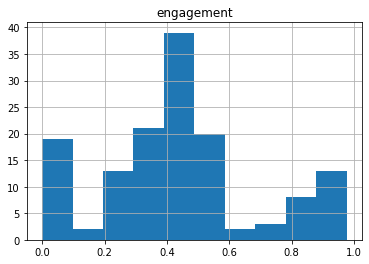

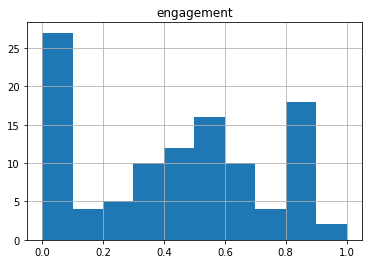

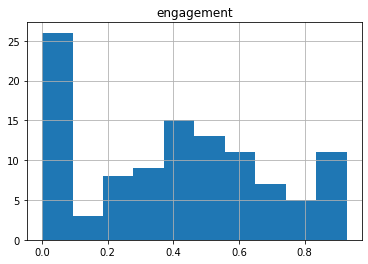

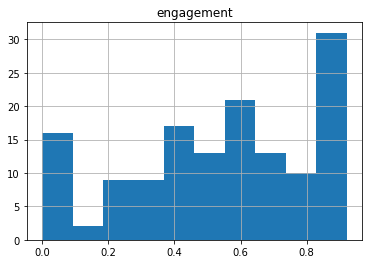

In [ ]:
country_2 =  df[df['country_id'] == 2]
country_2[['engagement', 'event_id']].groupby('event_id').mean().hist()

country_3 =  df[df['country_id'] == 3]
country_3[['engagement', 'event_id']].groupby('event_id').mean().hist()

country_4 =  df[df['country_id'] == 4]
country_4[['engagement', 'event_id']].groupby('event_id').mean().hist()

country_6 =  df[df['country_id'] == 6]
country_6[['engagement', 'event_id']].groupby('event_id').mean().hist()

country_7 =  df[df['country_id'] == 7]
country_7[['engagement', 'event_id']].groupby('event_id').mean().hist()

country_8 =  df[df['country_id'] == 8]
country_8[['engagement', 'event_id']].groupby('event_id').mean().hist()

country_12 =  df[df['country_id'] == 12]
country_12[['engagement', 'event_id']].groupby('event_id').mean().hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59aa46ae90>]],
      dtype=object)

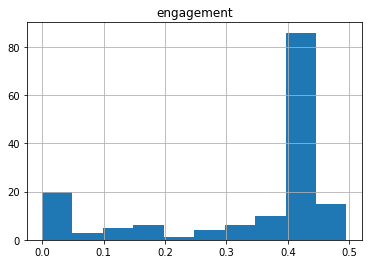

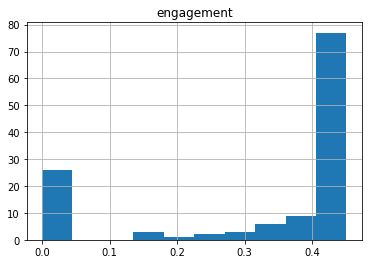

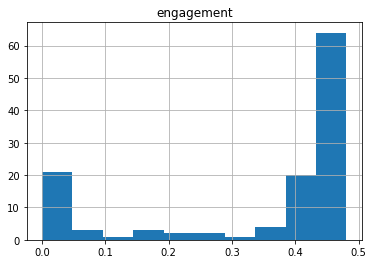

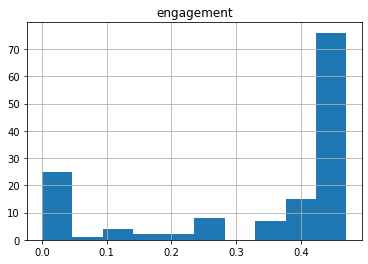

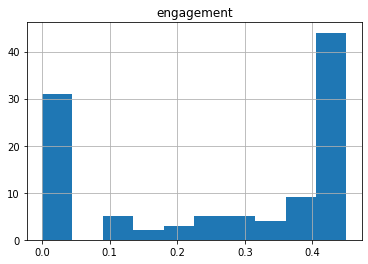

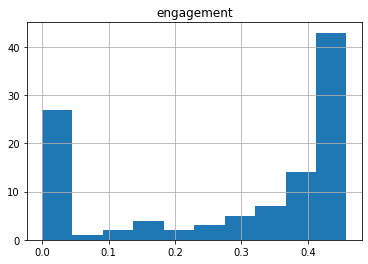

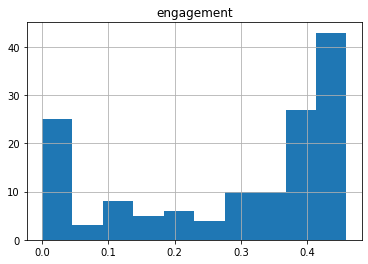

In [ ]:
country_2 =  df[df['country_id'] == 2]
country_2[['engagement', 'event_id']].groupby('event_id').std().hist()

country_3 =  df[df['country_id'] == 3]
country_3[['engagement', 'event_id']].groupby('event_id').std().hist()

country_4 =  df[df['country_id'] == 4]
country_4[['engagement', 'event_id']].groupby('event_id').std().hist()

country_6 =  df[df['country_id'] == 6]
country_6[['engagement', 'event_id']].groupby('event_id').std().hist()

country_7 =  df[df['country_id'] == 7]
country_7[['engagement', 'event_id']].groupby('event_id').std().hist()

country_8 =  df[df['country_id'] == 8]
country_8[['engagement', 'event_id']].groupby('event_id').std().hist()

country_12 =  df[df['country_id'] == 12]
country_12[['engagement', 'event_id']].groupby('event_id').std().hist()

**We can observe that some countries have almost the same behavior while others follow different distribution. We will choose countries with id 1, 2, 7 and 12 because they seem to follow different distribution**

In [ ]:
temp = country_1[['engagement', 'event_id']].groupby('event_id').mean() 
temp1 = temp[temp['engagement'] < 0.5]
temp1[temp1['engagement'] > 0.2].sample(random_state = 2)

,engagement
event_id,
52.0,0.375758


**0.375758 is a representative average engagement value for country 1**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f350a6b2b90>]],
      dtype=object)

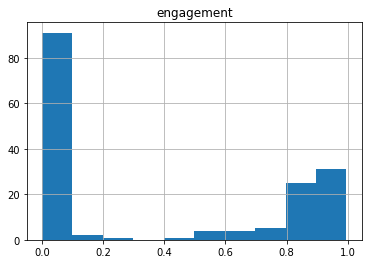

In [ ]:
temp = country_1[country_1['event_id'] == 52]
temp1 = temp[['viewer_id', 'engagement']].groupby('viewer_id').mean()
temp1.hist()

**A representative viewer sample lies in the interval [0.0, 0.1]**

In [ ]:
temp2 = temp1[temp1['engagement'] < 0.1]
temp2[temp2['engagement'] > 0.0]

,engagement
viewer_id,
80215.0,0.041383
80594.0,0.000076
81729.0,0.013523
84371.0,0.007445
84802.0,0.023528
88274.0,0.026188
89116.0,0.001769
90101.0,0.013866
101656.0,0.020061


**Not many viewers in the interval [0.0, 0.1] have average engament bigger than one. Tham means that the most of viewers have average engagement equal to 0, which means bad engagement level at every timestamp**

In [ ]:
temp = country_2[['engagement', 'event_id']].groupby('event_id').mean() 
temp1 = temp[temp['engagement'] <= 0.6]
temp1[temp1['engagement'] > 0.4].sample(random_state =4)

,engagement
event_id,
209.0,0.556271


**0.55 is a representative example for country 2**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f350a5bb250>]],
      dtype=object)

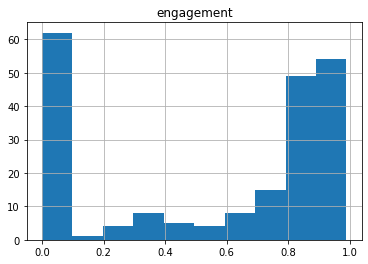

In [ ]:
temp = country_2[country_2['event_id'] == 209]
temp1 = temp[['viewer_id', 'engagement']].groupby('viewer_id').mean()
temp1.hist()

**Again , a lot of viewers have average engagement that is lies in the interval [0.0, 0.1], but they are not the majority. Lets take a sample from the interval [0.8, 1]**

In [ ]:
temp2 = temp1[temp1['engagement'] > 0.8]
temp2[temp2['engagement'] < 1]

,engagement
viewer_id,
20707.0,0.852666
21544.0,0.895973
22814.0,0.923931
23521.0,0.970398
23523.0,0.989018
...,...
100378.0,0.908732
104118.0,0.900000
105968.0,0.897295


In [ ]:
temp2.sample(random_state = 2)

,engagement
viewer_id,
57663.0,0.899034


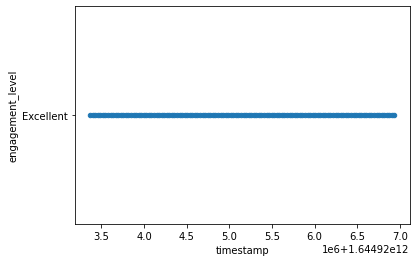

In [ ]:
temp[temp['viewer_id'] == 57663.0].sort_values('timestamp').plot(kind = 'scatter', x = 'timestamp', y = 'engagement_level')

**Not much of a suprise for mean 0.899**

**For country 7 we can see that a lot of events have average engagement inbetween 0 and 0.1, which is not informative because we can predict that a representative viewer will have bad engagement level in every timestamp.
Also, the majority of average mean is almost equally distributed in the interval [0.1, 1]**

**The same can be observed for country 12 but the spike is at the interval [0.9,1] and the majority of average mean is almost equally distributed at the interval [0, 0.9]**

In [ ]:
del(country_0, country_1, country_2, country_3, country_4, country_6, country_7, country_8, country_12)

# Viewer engagement level duration over city

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59acae7850>]],
      dtype=object)

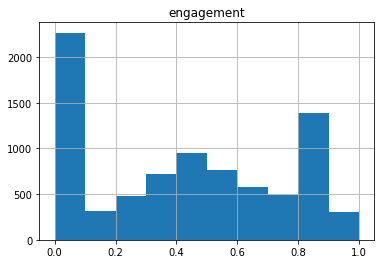

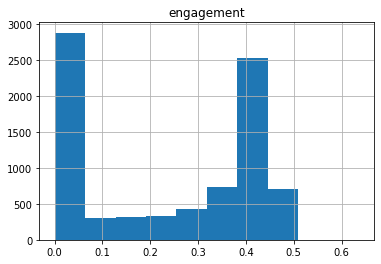

In [ ]:
temp = df[['engagement', 'city_id']].groupby('city_id').mean()
temp.hist()

df[['engagement', 'city_id']].groupby('city_id').std().hist()

Most cities have average engagement that lies in the intervals [0-0.1] and [0.4-0.9] with much less std compared to countries.

In [ ]:
temp = df[['city_id', 'event_id']].groupby('city_id').nunique()
temp

,event_id
city_id,
0.0,16
1.0,109
2.0,50
3.0,14
4.0,69
...,...
8238.0,1
8239.0,1
8240.0,1


In [ ]:
cities_most_events = temp[temp["event_id"] > 50]
cities_most_events

,event_id
city_id,
1.0,109
4.0,69
6.0,98
7.0,56
10.0,64
11.0,51
12.0,56
19.0,91
20.0,73


We will select cities with at least 50 events

In [ ]:
cities_most_events.sample(8 , random_state = 1)

,event_id
city_id,
35.0,53
54.0,51
7.0,56
98.0,58
126.0,75
84.0,57
56.0,57
81.0,63


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59aa6a8190>]],
      dtype=object)

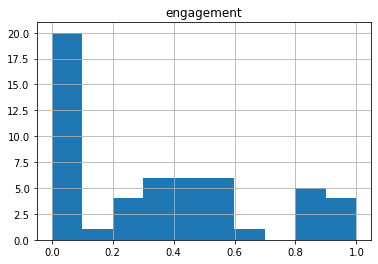

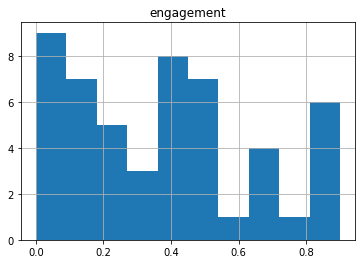

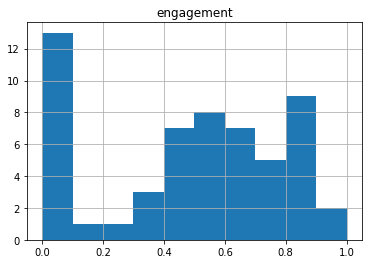

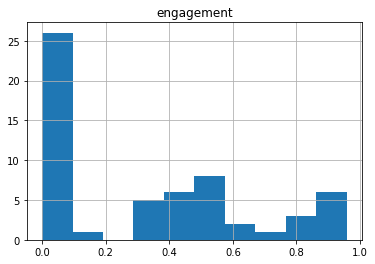

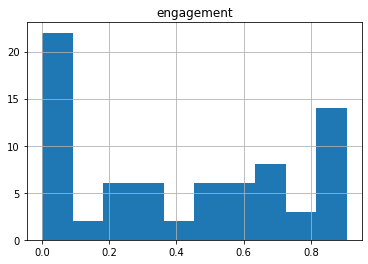

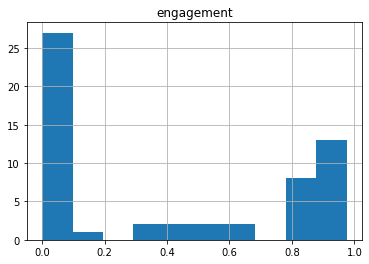

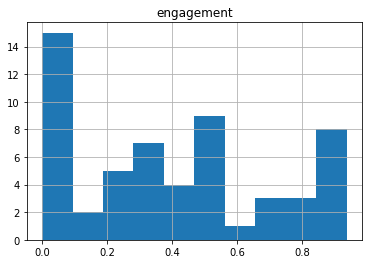

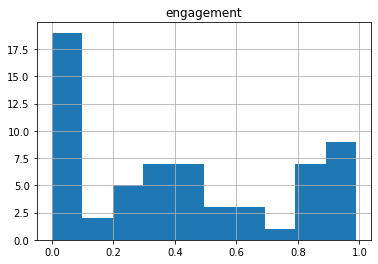

In [ ]:
city_35 =  df[df['city_id'] == 35]
city_35[['engagement', 'event_id']].groupby('event_id').mean().hist()

city_54 =  df[df['city_id'] == 54]
city_54[['engagement', 'event_id']].groupby('event_id').mean().hist()

city_7 =  df[df['city_id'] == 7]
city_7[['engagement', 'event_id']].groupby('event_id').mean().hist()

city_98 =  df[df['city_id'] == 98]
city_98[['engagement', 'event_id']].groupby('event_id').mean().hist()

city_126 =  df[df['city_id'] == 126]
city_126[['engagement', 'event_id']].groupby('event_id').mean().hist()

city_84 =  df[df['city_id'] == 84]
city_84[['engagement', 'event_id']].groupby('event_id').mean().hist()

city_56 =  df[df['city_id'] == 56]
city_56[['engagement', 'event_id']].groupby('event_id').mean().hist()

city_81 =  df[df['city_id'] == 81]
city_81[['engagement', 'event_id']].groupby('event_id').mean().hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59a9fa1810>]],
      dtype=object)

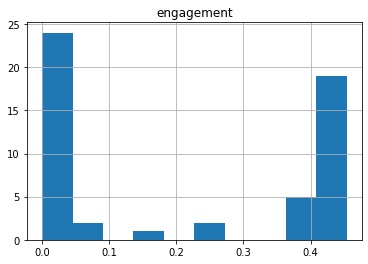

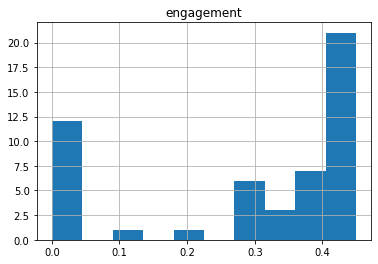

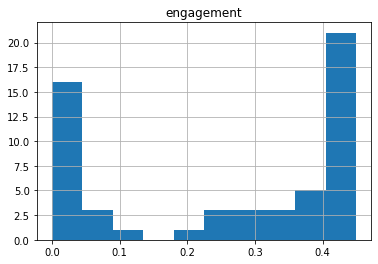

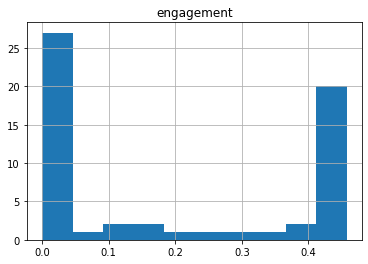

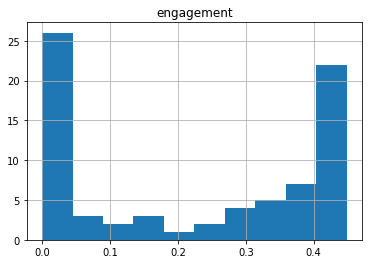

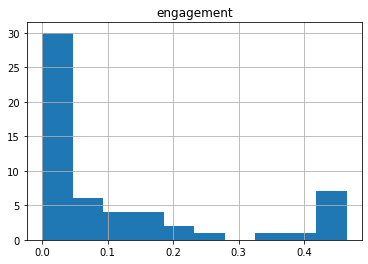

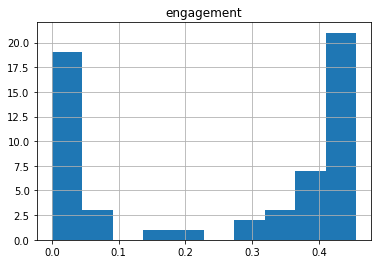

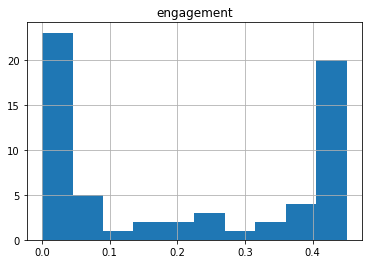

In [ ]:
city_35 =  df[df['city_id'] == 35]
city_35[['engagement', 'event_id']].groupby('event_id').std().hist()

city_54 =  df[df['city_id'] == 54]
city_54[['engagement', 'event_id']].groupby('event_id').std().hist()

city_7 =  df[df['city_id'] == 7]
city_7[['engagement', 'event_id']].groupby('event_id').std().hist()

city_98 =  df[df['city_id'] == 98]
city_98[['engagement', 'event_id']].groupby('event_id').std().hist()

city_126 =  df[df['city_id'] == 126]
city_126[['engagement', 'event_id']].groupby('event_id').std().hist()

city_84 =  df[df['city_id'] == 84]
city_84[['engagement', 'event_id']].groupby('event_id').std().hist()

city_56 =  df[df['city_id'] == 56]
city_56[['engagement', 'event_id']].groupby('event_id').std().hist()

city_81 =  df[df['city_id'] == 81]
city_81[['engagement', 'event_id']].groupby('event_id').std().hist()

We can see that different cities have different average engament and differnt std, thus different distribution. We will sample events from cities with id 54, 7 and 84 as they seem to have significant differences. 

In [ ]:
del(city_126, city_35, city_56, city_81, city_98)

In [ ]:
temp = city_54[['engagement', 'event_id']].groupby('event_id').mean() 
temp1 = temp[temp['engagement'] <= 0.5]
temp1[temp1['engagement'] > 0.1].sample(2,random_state = 10)

,engagement
event_id,
401.0,0.364117
183.0,0.258558


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59aa486610>]],
      dtype=object)

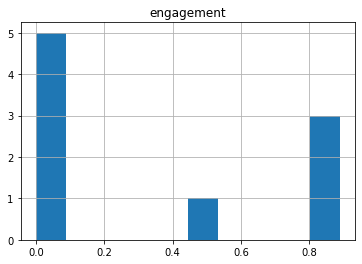

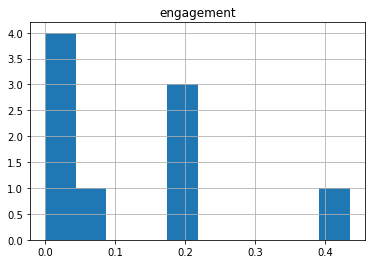

In [ ]:
temp = city_54[city_54['event_id'] == 401]
temp[['viewer_id', 'engagement']].groupby('viewer_id').mean().hist()
temp[['viewer_id', 'engagement']].groupby('viewer_id').std().hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59aa5aa0d0>]],
      dtype=object)

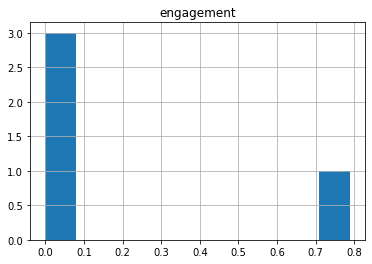

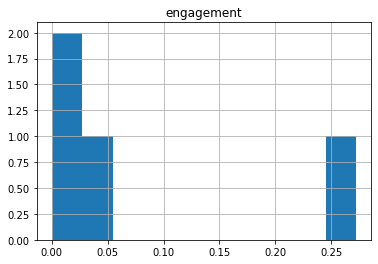

In [ ]:
temp = city_54[city_54['event_id'] == 183]
temp[['viewer_id', 'engagement']].groupby('viewer_id').mean().hist()
temp[['viewer_id', 'engagement']].groupby('viewer_id').std().hist()

In [ ]:
temp = city_7[['engagement', 'event_id']].groupby('event_id').mean() 
temp1 = temp[temp['engagement'] <= 0.9]
temp1[temp1['engagement'] > 0.4].sample(2,random_state = 10)

,engagement
event_id,
274.0,0.738192
431.0,0.479957


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59a9a46bd0>]],
      dtype=object)

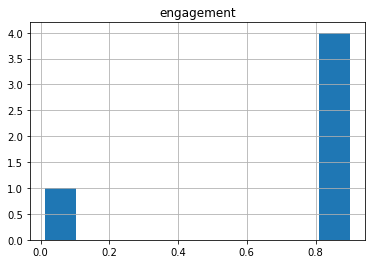

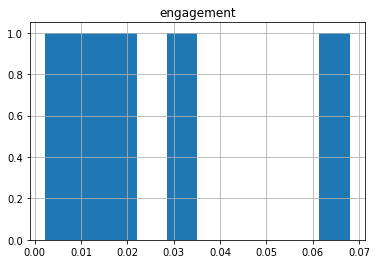

In [ ]:
temp = city_7[city_7['event_id'] == 274.0]
temp[['viewer_id', 'engagement']].groupby('viewer_id').mean().hist()
temp[['viewer_id', 'engagement']].groupby('viewer_id').std().hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59a9c12750>]],
      dtype=object)

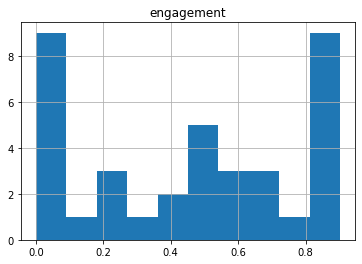

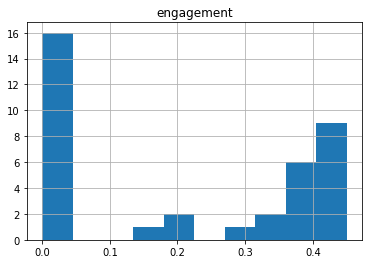

In [ ]:
temp = city_7[city_7['event_id'] == 431.0]
temp[['viewer_id', 'engagement']].groupby('viewer_id').mean().hist()
temp[['viewer_id', 'engagement']].groupby('viewer_id').std().hist()

In [ ]:
temp = city_84[['engagement', 'event_id']].groupby('event_id').mean() 
temp1 = temp[temp['engagement'] <= 0.7]
temp1[temp1['engagement'] > 0.1].sample(2,random_state = 10)

,engagement
event_id,
624.0,0.169520
60.0,0.585702


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59aa35c910>]],
      dtype=object)

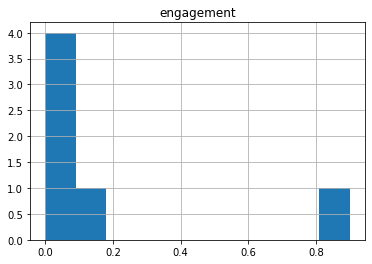

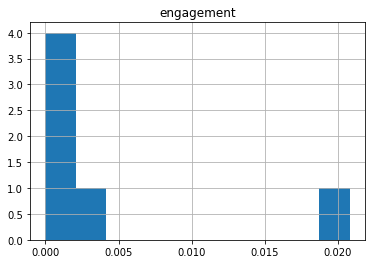

In [ ]:
temp = city_84[city_84['event_id'] == 624.0]
temp[['viewer_id', 'engagement']].groupby('viewer_id').mean().hist()
temp[['viewer_id', 'engagement']].groupby('viewer_id').std().hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59ad1fa650>]],
      dtype=object)

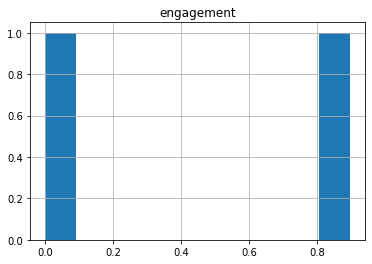

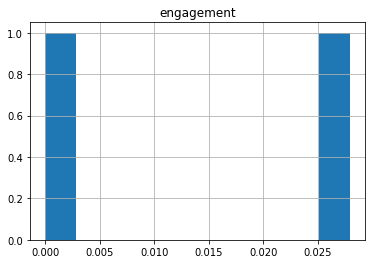

In [ ]:
temp = city_84[city_84['event_id'] == 60.0]
temp[['viewer_id', 'engagement']].groupby('viewer_id').mean().hist()
temp[['viewer_id', 'engagement']].groupby('viewer_id').std().hist()

In [ ]:
del(city_7, city_84, city_54)

# Viewer engagement level duration over viewer type

In [ ]:
wfh = df[df['viewer_type'] == 'WFH']
wfo = df[df['viewer_type'] == 'WFO']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83f56024d0>]],
      dtype=object)

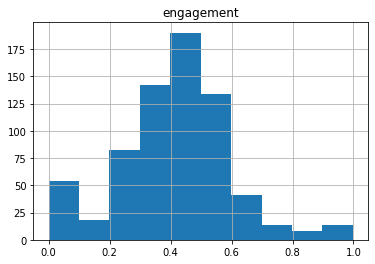

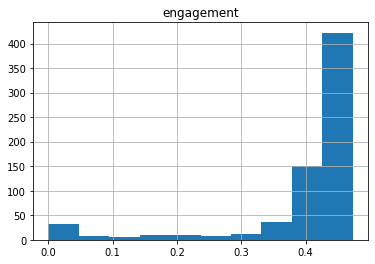

In [ ]:
wfh[['event_id', 'engagement']].groupby('event_id').mean().hist()
wfh[['event_id', 'engagement']].groupby('event_id').std().hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83f54b1490>]],
      dtype=object)

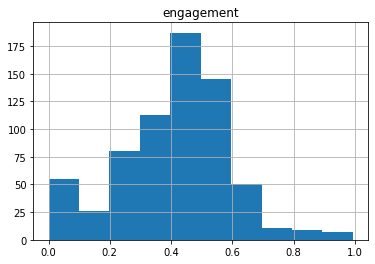

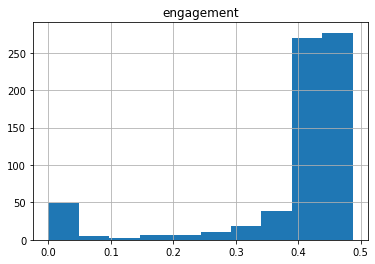

In [ ]:
wfo[['event_id', 'engagement']].groupby('event_id').mean().hist()
wfo[['event_id', 'engagement']].groupby('event_id').std().hist()

In [ ]:
del(wfo, wfh)

**We can see that the average engagement has almost identical distribution for the two viewer types but their is a significant difference in std**

# Correlation between data

In [ ]:
timestamps = df['timestamp'].values

week_days = []
for i in range(len(timestamps)):
  week_days.append( datetime.fromtimestamp(timestamps[i]/1000).weekday() )

df['week_days'] = week_days

df['viewer_type'].replace(['WFO', 'WFH'], [0, 1], inplace=True)
df

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,engagement_level,week_days
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,0,0.999976,0.0,Bad,0
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,1,0.281964,0.9,Excellent,0
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,1,1.000000,0.9,Excellent,0
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,1,0.999988,0.0,Bad,0
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,0,1.000000,0.0,Bad,0
...,...,...,...,...,...,...,...,...,...,...,...
20615365,1647872264309,1.0,401.0,845.0,19.0,3.0,0,1.000000,0.0,Bad,0
20615366,1647872276879,1.0,401.0,11100.0,3963.0,3.0,0,1.000000,0.0,Bad,0
20615367,1647872288293,1.0,401.0,2155.0,6.0,1.0,0,1.000000,0.0,Bad,0
20615368,1647872288564,1.0,401.0,1011.0,19.0,3.0,0,1.000000,0.9,Excellent,0


In [ ]:
df_groupby = df.groupby('event_id').agg(['unique'])['viewer_id']
df_groupby

,unique
event_id,
0.0,"[1148.0, 1301.0, 3392.0, 6409.0, 48967.0, 1458..."
1.0,"[6352.0, 8519.0, 6247.0, 305.0, 705.0, 22398.0..."
2.0,"[23544.0, 31697.0, 13080.0, 33038.0, 6870.0, 1..."
3.0,"[2645.0, 1811.0, 1846.0, 1027.0, 9012.0, 52566..."
4.0,"[2204.0, 40977.0, 3853.0, 11856.0, 1772.0, 405..."
...,...
729.0,[96046.0]
730.0,"[107357.0, 107167.0, 45929.0, 107652.0, 108912.0]"
731.0,[18978.0]


In [ ]:
count_viewers = []
for i in range(len(df_groupby)):
    count_viewers.append(len(df_groupby.iloc[i][0]))

print(count_viewers)

[3428, 3364, 3834, 3323, 1461, 2446, 4020, 3623, 3295, 1502, 1740, 2030, 1078, 1895, 1909, 1800, 1131, 354, 2174, 1485, 205, 515, 2029, 272, 833, 811, 342, 1995, 222, 1258, 1301, 766, 822, 1283, 600, 429, 516, 645, 680, 683, 730, 542, 848, 541, 1762, 503, 485, 251, 434, 570, 844, 291, 1252, 677, 434, 635, 292, 300, 936, 584, 567, 251, 193, 709, 409, 485, 1087, 447, 922, 732, 896, 726, 925, 364, 306, 635, 680, 880, 129, 336, 520, 648, 873, 753, 533, 592, 485, 364, 544, 583, 611, 154, 2146, 707, 624, 479, 573, 321, 780, 425, 171, 290, 327, 577, 549, 309, 614, 501, 260, 550, 421, 533, 153, 484, 431, 238, 358, 318, 376, 533, 387, 587, 429, 527, 532, 283, 177, 548, 534, 402, 728, 381, 333, 379, 31, 470, 272, 303, 335, 24, 115, 596, 419, 313, 340, 314, 682, 110, 300, 288, 263, 72, 122, 295, 404, 279, 335, 357, 497, 206, 298, 102, 411, 438, 720, 290, 249, 480, 310, 268, 315, 456, 211, 278, 457, 391, 308, 285, 146, 65, 249, 284, 296, 385, 449, 49, 200, 259, 121, 224, 275, 297, 368, 311, 306, 5

In [ ]:
df_groupby['count_viewers'] = count_viewers
df_groupby

,unique,count_viewers
event_id,,
0.0,"[1148.0, 1301.0, 3392.0, 6409.0, 48967.0, 1458...",3428
1.0,"[6352.0, 8519.0, 6247.0, 305.0, 705.0, 22398.0...",3364
2.0,"[23544.0, 31697.0, 13080.0, 33038.0, 6870.0, 1...",3834
3.0,"[2645.0, 1811.0, 1846.0, 1027.0, 9012.0, 52566...",3323
4.0,"[2204.0, 40977.0, 3853.0, 11856.0, 1772.0, 405...",1461
...,...,...
729.0,[96046.0],1
730.0,"[107357.0, 107167.0, 45929.0, 107652.0, 108912.0]",5
731.0,[18978.0],1


In [ ]:


events = list(df['event_id'])
events[0]

107.0

In [ ]:
event_n_viewers = np.zeros(len(df))
events = list(df['event_id'])


for i in range(len(df)):
  event_id = events[i]
  n_viewership = df_groupby['count_viewers'].loc[event_id]
  event_n_viewers[i] = n_viewership

In [ ]:
df['event_n_viewer'] = event_n_viewers
del(event_n_viewers)
df

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,engagement_level,week_days,event_n_viewer
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,0,0.999976,0.0,Bad,0,501.0
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,1,0.281964,0.9,Excellent,0,501.0
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,1,1.000000,0.9,Excellent,0,501.0
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,1,0.999988,0.0,Bad,0,501.0
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,0,1.000000,0.0,Bad,0,501.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20615365,1647872264309,1.0,401.0,845.0,19.0,3.0,0,1.000000,0.0,Bad,0,300.0
20615366,1647872276879,1.0,401.0,11100.0,3963.0,3.0,0,1.000000,0.0,Bad,0,300.0
20615367,1647872288293,1.0,401.0,2155.0,6.0,1.0,0,1.000000,0.0,Bad,0,300.0
20615368,1647872288564,1.0,401.0,1011.0,19.0,3.0,0,1.000000,0.9,Excellent,0,300.0


In [ ]:
del(df_groupby)

In [ ]:
events = df['event_id'].unique()
event_duration = []
for event in events:
  duration = df[df["event_id"] == event]['timestamp'].max() - df[df["event_id"] == event]['timestamp'].min()
  event_duration.append(duration)

In [ ]:
event_duration

[4077704,
 2727401,
 7122046,
 3599671,
 4127088,
 3999272,
 7339130,
 2254900,
 8028310,
 3738653,
 2100961,
 5593545,
 3916869,
 5574089,
 1239717,
 3898168,
 5793094,
 3657530,
 3119307,
 3397893,
 4049204,
 4385780,
 2309364,
 1820278,
 2189460,
 5371463,
 3993088,
 2488241,
 2626267,
 22379022,
 8726210,
 2003062,
 4101261,
 4036358,
 5690550,
 4363542,
 2957910,
 9990000,
 5230928,
 4245924,
 4138759,
 9195292,
 3962164,
 1224237,
 1610195,
 4718600,
 8125136,
 9427024,
 2788943,
 3276777,
 6333135,
 5043103,
 3919043,
 3824937,
 5439201,
 3916230,
 4106985,
 3877711,
 8878741,
 3115691,
 4033584,
 8810033,
 3725058,
 5265951,
 2257087,
 2197799,
 5524923,
 3769413,
 3539723,
 3895095,
 4250785,
 4343032,
 3836815,
 3799564,
 4013813,
 4322063,
 1339060,
 3861512,
 3130172,
 3200177,
 3533094,
 4259601,
 3530153,
 4914083,
 3625788,
 12769975,
 7492469,
 1771579,
 5515102,
 2818689,
 3748974,
 2858046,
 1878988,
 2214430,
 2599756,
 4245767,
 1661872,
 2475224,
 9070627,
 3849756

In [ ]:
pos = np.where(events == 20)
pos[0][0]

11

In [ ]:
ordered_event_duration = []
for event in df['event_id']:
  pos = np.where(events == event)
  ordered_event_duration.append(event_duration[pos[0][0]])

ordered_event_duration

[4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,
 4077704,


In [ ]:
del(event_duration)

In [ ]:
df['event_duration'] = ordered_event_duration
df

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,engagement_level,week_days,event_n_viewer,event_duration
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,0,0.999976,0.0,Bad,0,501.0,4077704
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,1,0.281964,0.9,Excellent,0,501.0,4077704
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,1,1.000000,0.9,Excellent,0,501.0,4077704
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,1,0.999988,0.0,Bad,0,501.0,4077704
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,0,1.000000,0.0,Bad,0,501.0,4077704
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20615365,1647872264309,1.0,401.0,845.0,19.0,3.0,0,1.000000,0.0,Bad,0,300.0,1376563
20615366,1647872276879,1.0,401.0,11100.0,3963.0,3.0,0,1.000000,0.0,Bad,0,300.0,1376563
20615367,1647872288293,1.0,401.0,2155.0,6.0,1.0,0,1.000000,0.0,Bad,0,300.0,1376563
20615368,1647872288564,1.0,401.0,1011.0,19.0,3.0,0,1.000000,0.9,Excellent,0,300.0,1376563


In [ ]:
viewers_retention = np.zeros(len(df))
events = df['event_id'].unique()

for event in events:
  temp = df[df['event_id'] == event][['viewer_id', 'timestamp']]
  viewers = temp['viewer_id'].unique()   
  for viewer in viewers:
    viewer_retention = temp[temp['viewer_id'] == viewer]['timestamp'].count() * 30000
    idxs = temp[temp['viewer_id'] == viewer].index
    for idx in idxs:
      viewers_retention[idx] = viewer_retention
    
df['viewer_retention'] = viewers_retention
del(viewers_retention)

In [ ]:
df.head()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,engagement_level,week_days,event_n_viewer,event_duration,viewer_retention
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,0,0.999976,0.0,Bad,0,501.0,4077704,3750000.0
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,1,0.281964,0.9,Excellent,0,501.0,4077704,3540000.0
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,1,1.000000,0.9,Excellent,0,501.0,4077704,1500000.0
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,1,0.999988,0.0,Bad,0,501.0,4077704,3690000.0
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,0,1.000000,0.0,Bad,0,501.0,4077704,3480000.0


In [ ]:
from scipy.stats import ttest_ind

a = df['engagement'].to_numpy()
b = df['customer_id'].to_numpy()
t,p = ttest_ind(a = a, b= b)
print(f'(t_value = {t}, p_value = {p}): correlation between engagement and customer_id' )

b = df['event_id'].to_numpy()
t,p = ttest_ind(a = a, b= b)
print(f'(t_value = {t}, p_value = {p}): correlation between engagement and event_id' )

b = df['viewer_id'].to_numpy()
t,p = ttest_ind(a = a, b= b)
print(f'(t_value = {t}, p_value = {p}): correlation between engagement and viewer_id' )

b = df['city_id'].to_numpy()
t,p = ttest_ind(a = a, b= b)
print(f'(t_value = {t}, p_value = {p}): correlation between engagement and city_id' )

b = df['country_id'].to_numpy()
t,p = ttest_ind(a = a, b= b)
print(f'(t_value = {t}, p_value = {p}): correlation between engagement and country_id' )

b = df['viewer_type'].to_numpy()
t,p = ttest_ind(a = a, b= b)
print(f'(t_value = {t}, p_value = {p}): correlation between engagement and viewer_type' )

b = df['qoe'].to_numpy()
t,p = ttest_ind(a = a, b= b)
print(f'(t_value = {t}, p_value = {p}): correlation between engagement and qoe' )

b = df['week_days'].to_numpy()
t,p = ttest_ind(a = a, b= b)
print(f'(t_value = {t}, p_value = {p}): correlation between engagement and week_days' )


(t_value = -4704.508507193316, p_value = 0.0): correlation between engagement and customer_id
(t_value = -3715.5211872678883, p_value = 0.0): correlation between engagement and event_id
(t_value = -4885.053822321619, p_value = 0.0): correlation between engagement and viewer_id
(t_value = -1834.973680446528, p_value = 0.0): correlation between engagement and city_id
(t_value = -2664.3722779510877, p_value = 0.0): correlation between engagement and country_id
(t_value = 1034.2514604258618, p_value = 0.0): correlation between engagement and viewer_type
(t_value = -5412.010866291646, p_value = 0.0): correlation between engagement and qoe
(t_value = -6492.035633658608, p_value = 0.0): correlation between engagement and week_days


In [ ]:
a = df['qoe'].to_numpy()
b = df['customer_id'].to_numpy()
t,p = ttest_ind(a = a, b= b)
print(f'(t_value = {t}, p_value = {p}): correlation between qoe and customer_id' )

b = df['event_id'].to_numpy()
t,p = ttest_ind(a = a, b= b)
print(f'(t_value = {t}, p_value = {p}): correlation between qoe and event_id' )

b = df['viewer_id'].to_numpy()
t,p = ttest_ind(a = a, b= b)
print(f'(t_value = {t}, p_value = {p}): correlation between qoe and viewer_id' )

b = df['city_id'].to_numpy()
t,p = ttest_ind(a = a, b= b)
print(f'(t_value = {t}, p_value = {p}): correlation between qoe and city_id' )

b = df['country_id'].to_numpy()
t,p = ttest_ind(a = a, b= b)
print(f'(t_value = {t}, p_value = {p}): correlation between qoe and country_id' )

b = df['viewer_type'].to_numpy()
t,p = ttest_ind(a = a, b= b)
print(f'(t_value = {t}, p_value = {p}): correlation between qoe and viewer_type' )

b = df['week_days'].to_numpy()
t,p = ttest_ind(a = a, b= b)
print(f'(t_value = {t}, p_value = {p}): correlation between qoe and week_days' )


(t_value = -4365.043776756817, p_value = 0.0): correlation between qoe and customer_id
(t_value = -3696.263192086092, p_value = 0.0): correlation between qoe and event_id
(t_value = -4884.95938476674, p_value = 0.0): correlation between qoe and viewer_id
(t_value = -1832.5412981754005, p_value = 0.0): correlation between qoe and city_id
(t_value = -2354.862425483218, p_value = 0.0): correlation between qoe and country_id
(t_value = 6718.361433065512, p_value = 0.0): correlation between qoe and viewer_type
(t_value = -4960.506113110034, p_value = 0.0): correlation between qoe and week_days


In [ ]:
a = df['qoe'].to_numpy()
b = df['event_n_viewer'].to_numpy()
print(np.corrcoef(a,b))

a = df['engagement'].to_numpy()
b = df['event_n_viewer'].to_numpy()
print(np.corrcoef(a,b))

a = df['engagement'].to_numpy()
b = df['qoe'].to_numpy()
print(np.corrcoef(a,b))

a = df['engagement'].to_numpy()
b = df['event_duration'].to_numpy()
print(np.corrcoef(a,b))

a = df['qoe'].to_numpy()
b = df['event_duration'].to_numpy()
print(np.corrcoef(a,b))

a = df['qoe'].to_numpy()
b = df['viewer_retention'].to_numpy()
print(np.corrcoef(a,b))

a = df['engagement'].to_numpy()
b = df['viewer_retention'].to_numpy()
print(np.corrcoef(a,b))

del(a,b)

[[1.         0.00565457]
 [0.00565457 1.        ]]
[[ 1.        -0.0753586]
 [-0.0753586  1.       ]]
[[ 1.         -0.00138472]
 [-0.00138472  1.        ]]
[[1.         0.09757215]
 [0.09757215 1.        ]]
[[1.         0.01926557]
 [0.01926557 1.        ]]
[[1.         0.03036319]
 [0.03036319 1.        ]]
[[1.         0.08801673]
 [0.08801673 1.        ]]
